# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
df=pd.read_csv("breast-cancer-wisconsin-data.csv")
df.sample(10)

ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
194  1212422               3          1           1                  1   
125  1176406               1          1           1                  1   
640  1285722               4          1           1                  3   
76   1132347               1          1           4                  1   
378   657753               3          1           1                  4   
594  1315506               4          8           6                  3   
387  1114570               5          3           3                  2   
400  1211265               3         10           8                  7   
106  1170419              10         10          10                  8   
240  1270479               5          1           3                  3   

     Single Epithelial Cell Size Bare Nuclei  Normal Nucleoli  \
194                            2           1                3   
125                            2           1                2   
640                            2           1                1   
76                             2           1                2   
378                            3           1                2   
594                            4          10                7   
387                            3           1                3   
400                            6           9                9   
106                            2          10                4   
240                            2           2                2   

     Bland Chromatin  Mitoses  Class  
194                1        1      2  
125                1        1      2  
640                1        1      2  
76                 1        1      2  
378                2        1      2  
594                1        1      4  
387                1        1      2  
400                3        8      4  
106                1        1      4  
240                3        1      2

## Inference:-
### 1. We have 11 columns with "Class being the target variable.
### 2. All the columns are having numerical data.
### 3. "Id" and "Class" columns is not necessary for PCA

In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           699 non-null    int64 
 1   ClumpThickness               699 non-null    int64 
 2   Cell Size                    699 non-null    int64 
 3   Cell Shape                   699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Normal Nucleoli              699 non-null    int64 
 8   Bland Chromatin              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [5]:
df.shape

(699, 11)

## Inference:-
### 1. We have got 699 entries for all the 11 columns.
### 2. We have every other columns data type as 'int64' except  "Bare Nuclei"  column which is 'object'. 

In [6]:
 df.describe()

ID  ClumpThickness   Cell Size  Cell Shape  \
count  6.990000e+02      699.000000  699.000000  699.000000   
mean   1.071704e+06        4.417740    3.134478    3.207439   
std    6.170957e+05        2.815741    3.051459    2.971913   
min    6.163400e+04        1.000000    1.000000    1.000000   
25%    8.706885e+05        2.000000    1.000000    1.000000   
50%    1.171710e+06        4.000000    1.000000    1.000000   
75%    1.238298e+06        6.000000    5.000000    5.000000   
max    1.345435e+07       10.000000   10.000000   10.000000   

       Marginal Adhesion  Single Epithelial Cell Size  Normal Nucleoli  \
count         699.000000                   699.000000       699.000000   
mean            2.806867                     3.216023         3.437768   
std             2.855379                     2.214300         2.438364   
min             1.000000                     1.000000         1.000000   
25%             1.000000                     2.000000         2.000000   
50%             1.000000                     2.000000         3.000000   
75%             4.000000                     4.000000         5.000000   
max            10.000000                    10.000000        10.000000   

       Bland Chromatin     Mitoses       Class  
count       699.000000  699.000000  699.000000  
mean          2.866953    1.589413    2.689557  
std           3.053634    1.715078    0.951273  
min           1.000000    1.000000    2.000000  
25%           1.000000    1.000000    2.000000  
50%           1.000000    1.000000    2.000000  
75%           4.000000    1.000000    4.000000  
max          10.000000   10.000000    4.000000

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set
df["Bare Nuclei"].unique()
# Check for missing value in any other column

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

## Inference:-
### 1. We have got "?" entries infiltrating the data.

In [8]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having ?
def missing_zero_values_table(df):
        zero_val = (df == 0.00).astype(int).sum(axis=0)
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mz_table = pd.concat([zero_val, mis_val, mis_val_percent], axis=1)
        mz_table = mz_table.rename(
        columns = {0 : 'Zero Values', 1 : 'Missing Values', 2 : '% of Total Values'})
        mz_table['Total Zero Missing Values'] = mz_table['Zero Values'] + mz_table['Missing Values']
        mz_table['% Total Zero Missing Values'] = 100 * mz_table['Total Zero Missing Values'] / len(df)
        mz_table['Data Type'] = df.dtypes
        mz_table = mz_table[
            mz_table.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " + str(mz_table.shape[0]) +
              " columns that have missing values.")
        return mz_table

missing_zero_values_table(df)

Your selected dataframe has 11 columns and 699 Rows.
There are 0 columns that have missing values.


Empty DataFrame
Columns: [Zero Values, Missing Values, % of Total Values, Total Zero Missing Values, % Total Zero Missing Values, Data Type]
Index: []

## Inference:-
### 1. We have got no null or '0' value entries in the dataset.

In [9]:
df['Bare Nuclei'].replace("?","1",inplace=True) #Replacing "?" with mode of the dataset which is "1"
df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [10]:
df['Bare Nuclei']=df['Bare Nuclei'].astype('int64') #COnverting "Bare Nuclei" column as int64 data type.
df.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
df[df['Bare Nuclei']=='?'].count()

D:\Program_Files\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [12]:
dups=df.duplicated()
print("No. of Duplicates in DataFrame: ", dups.sum())
df[dups]

No. of Duplicates in DataFrame:  9


ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
208  1218860               1          1           1                  1   
253  1100524               6         10          10                  2   
254  1116116               9         10          10                  1   
258  1198641               3          1           1                  1   
272   320675               3          3           5                  2   
322   733639               3          1           1                  1   
338   704097               1          1           1                  1   
561  1321942               5          1           1                  1   
684   466906               1          1           1                  1   

     Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  \
208                            1            1                3   
253                            8           10                7   
254                           10            8                3   
258                            2            1                3   
272                            3           10                7   
322                            2            1                3   
338                            1            1                2   
561                            2            1                3   
684                            2            1                1   

     Bland Chromatin  Mitoses  Class  
208                1        1      2  
253                3        3      4  
254                3        1      4  
258                1        1      2  
272                1        1      4  
322                1        1      2  
338                1        1      2  
561                1        1      2  
684                1        1      2

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [13]:
# Check for correlation of variable
df.corr()

ID  ClumpThickness  Cell Size  Cell Shape  \
ID                           1.000000       -0.055308  -0.041603   -0.041576   
ClumpThickness              -0.055308        1.000000   0.644913    0.654589   
Cell Size                   -0.041603        0.644913   1.000000    0.906882   
Cell Shape                  -0.041576        0.654589   0.906882    1.000000   
Marginal Adhesion           -0.064878        0.486356   0.705582    0.683079   
Single Epithelial Cell Size -0.045528        0.521816   0.751799    0.719668   
Bare Nuclei                 -0.092533        0.590008   0.686673    0.707474   
Normal Nucleoli             -0.060051        0.558428   0.755721    0.735948   
Bland Chromatin             -0.052072        0.535835   0.722865    0.719446   
Mitoses                     -0.034901        0.350034   0.458693    0.438911   
Class                       -0.080226        0.716001   0.817904    0.818934   

                             Marginal Adhesion  Single Epithelial Cell Size  \
ID                                   -0.064878                    -0.045528   
ClumpThickness                        0.486356                     0.521816   
Cell Size                             0.705582                     0.751799   
Cell Shape                            0.683079                     0.719668   
Marginal Adhesion                     1.000000                     0.599599   
Single Epithelial Cell Size           0.599599                     1.000000   
Bare Nuclei                           0.666971                     0.583701   
Normal Nucleoli                       0.666715                     0.616102   
Bland Chromatin                       0.603352                     0.628881   
Mitoses                               0.417633                     0.479101   
Class                                 0.696800                     0.682785   

                             Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
ID                             -0.092533        -0.060051        -0.052072   
ClumpThickness                  0.590008         0.558428         0.535835   
Cell Size                       0.686673         0.755721         0.722865   
Cell Shape                      0.707474         0.735948         0.719446   
Marginal Adhesion               0.666971         0.666715         0.603352   
Single Epithelial Cell Size     0.583701         0.616102         0.628881   
Bare Nuclei                     1.000000         0.674215         0.574778   
Normal Nucleoli                 0.674215         1.000000         0.665878   
Bland Chromatin                 0.574778         0.665878         1.000000   
Mitoses                         0.342397         0.344169         0.428336   
Class                           0.818968         0.756616         0.712244   

                              Mitoses     Class  
ID                          -0.034901 -0.080226  
ClumpThickness               0.350034  0.716001  
Cell Size                    0.458693  0.817904  
Cell Shape                   0.438911  0.818934  
Marginal Adhesion            0.417633  0.696800  
Single Epithelial Cell Size  0.479101  0.682785  
Bare Nuclei                  0.342397  0.818968  
Normal Nucleoli              0.344169  0.756616  
Bland Chromatin              0.428336  0.712244  
Mitoses                      1.000000  0.423170  
Class                        0.423170  1.000000

## Inferences:-
### 1. Cell size has high positive correlation with Cell Shape,Marginal Adhesion, Single Epithelial Cell Size, Normal Nuclei and Bland Chromatin.
### 2. Class has high correlations with most of the variables.

In [14]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

D:\Program_Files\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Program_Files\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Program_Files\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Program_Files\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Program_Files\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
D:\Program_Files\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserW

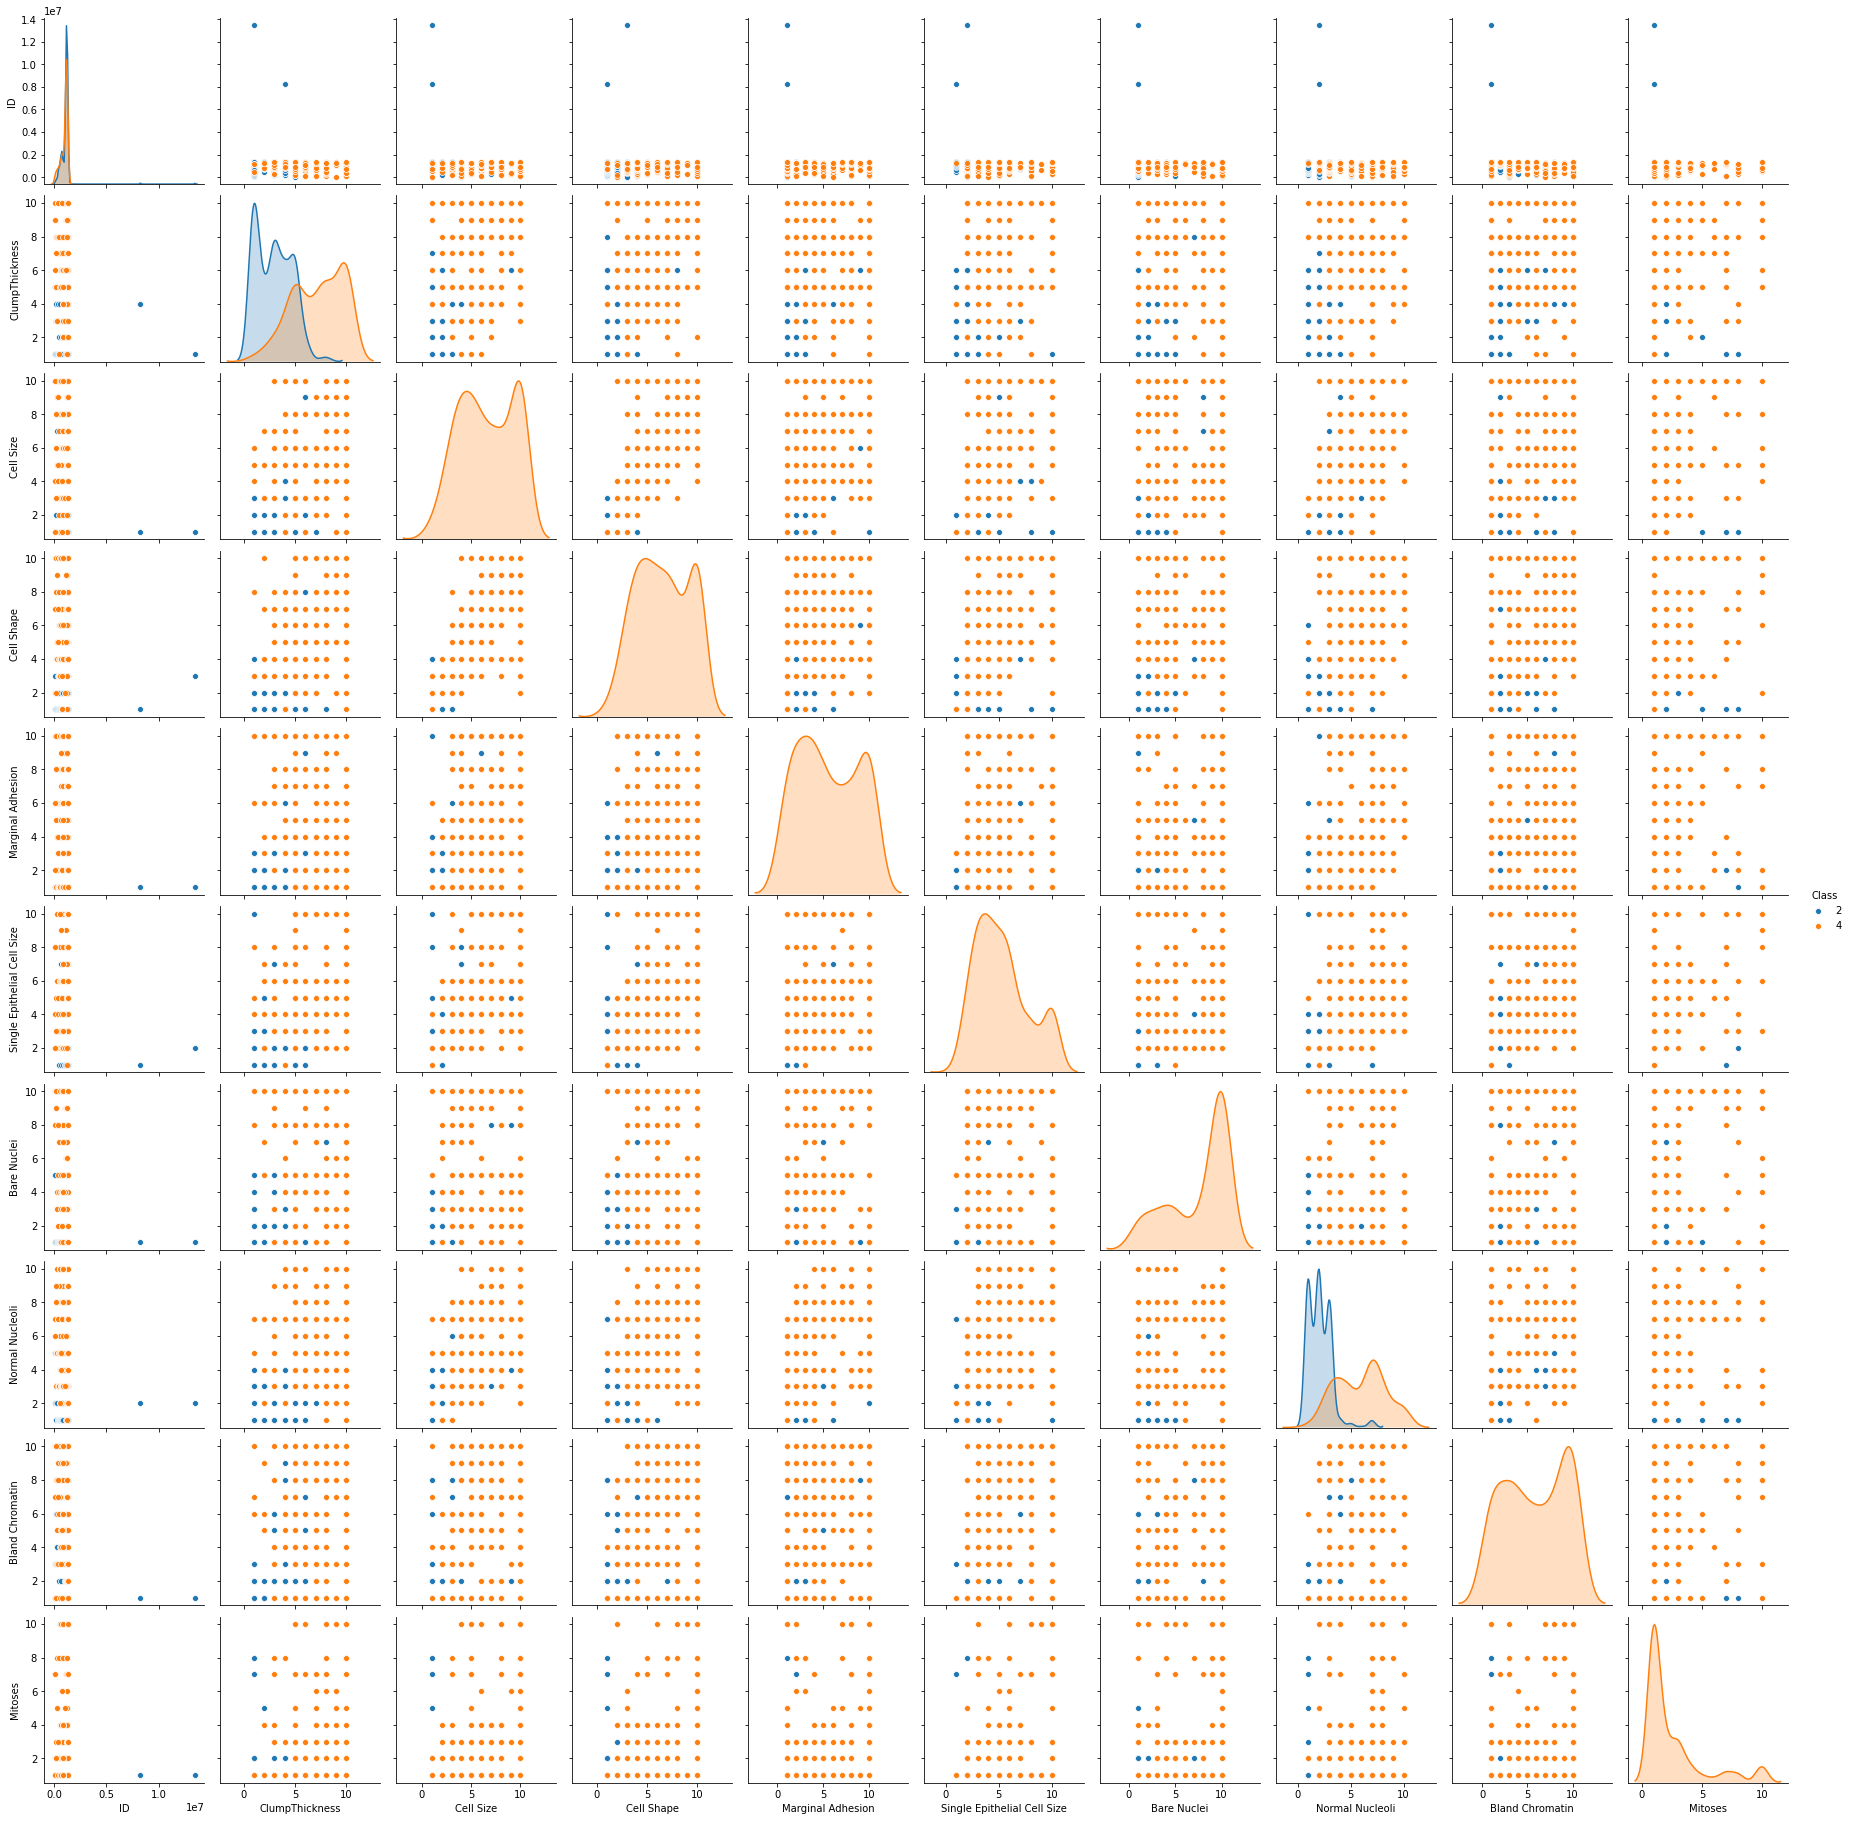

In [15]:
#Let us check for pair plots
sns.pairplot(df, hue = 'Class', diag_kind = 'kde')

## Inferences:-
### 1. Clamp thickness and Normal Nuclei is helping in the class distinction.
### 2. All variables are multinodal.
### 3. Range for all variables is between 1 and 10.

In [16]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [17]:
# We could see most of the outliers are now removed.

In [18]:
df=df.drop(['ID'],axis=1)

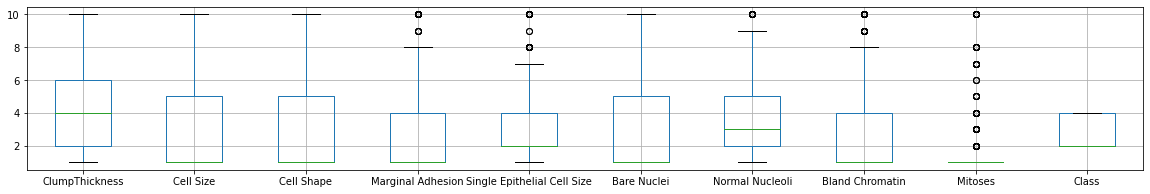

In [19]:
df.boxplot(figsize=(20,3))

## Inferences:-
### 1. Marginal Adhesion, Single Epithelial Cell Size, Normal Nuclei, Bland Chromatin and Mitoses have outliers.

In [20]:
pd.crosstab(df['Marginal Adhesion'],df['Class'])

Class                2   4
Marginal Adhesion         
1                  375  32
2                   37  21
3                   31  27
4                    5  28
5                    4  19
6                    4  18
7                    0  13
8                    0  25
9                    1   4
10                   1  54

In [21]:
df['Marginal Adhesion']=np.where(df['Marginal Adhesion']>6,6,df['Marginal Adhesion'])

In [22]:
pd.crosstab(df['Single Epithelial Cell Size'],df['Class'])

Class                          2   4
Single Epithelial Cell Size         
1                             46   1
2                            363  23
3                             29  43
4                              7  41
5                              5  34
6                              2  39
7                              3   9
8                              2  19
9                              0   2
10                             1  30

In [23]:
df['Single Epithelial Cell Size']=np.where(df['Single Epithelial Cell Size']>7,7,df['Single Epithelial Cell Size'])

In [24]:
pd.crosstab(df['Normal Nucleoli'],df['Class'])

Class              2   4
Normal Nucleoli         
1                150   2
2                159   7
3                129  36
4                  8  32
5                  4  30
6                  1   9
7                  7  66
8                  0  28
9                  0  11
10                 0  20

In [25]:
df['Normal Nucleoli']=np.where(df['Normal Nucleoli']>6,6,df['Normal Nucleoli'])

In [26]:
pd.crosstab(df['Bland Chromatin'],df['Class'])

Class              2   4
Bland Chromatin         
1                402  41
2                 30   6
3                 12  32
4                  1  17
5                  2  17
6                  4  18
7                  2  14
8                  4  20
9                  1  15
10                 0  61

In [27]:
df['Bland Chromatin']=np.where(df['Bland Chromatin']>4,4,df['Bland Chromatin'])

In [28]:
pd.crosstab(df['Mitoses'],df['Class'])

Class      2    4
Mitoses          
1        445  134
2          8   27
3          2   31
4          0   12
5          1    5
6          0    3
7          1    8
8          1    7
10         0   14

In [29]:
df['Mitoses']=np.where(df['Mitoses']>3,3,df['Mitoses'])

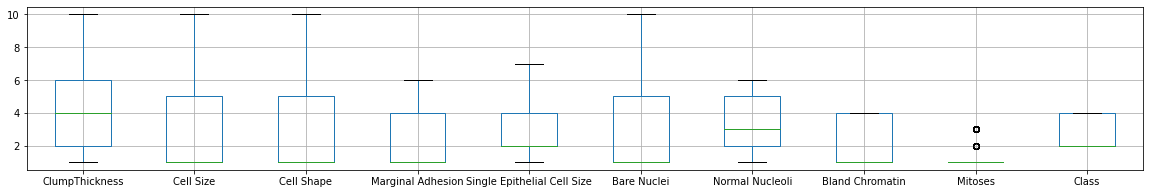

In [30]:
df.boxplot(figsize=(20,3))

## Inferences:-
### 1. Grouping together the values to remove or reduce the no. of outliers.

In [31]:
df_pca=df.drop(['Class'],axis=1)
df_pca.sample(10)

ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
88                4          1           1                  1   
350               5          1           1                  3   
70                5          1           3                  1   
486               3          1           1                  1   
627               2          1           1                  1   
374               3          1           2                  1   
321               3          1           1                  1   
556               5          2           2                  2   
110               1          3           1                  2   
600               3          1           1                  1   

     Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  \
88                             2            1                3   
350                            2            1                1   
70                             2            1                2   
486                            1            1                2   
627                            2            5                1   
374                            2            1                2   
321                            2            1                3   
556                            1            1                2   
110                            2            2                5   
600                            2            1                2   

     Bland Chromatin  Mitoses  
88                 1        1  
350                1        1  
70                 1        1  
486                1        1  
627                1        1  
374                1        1  
321                1        1  
556                1        1  
110                3        2  
600                1        1

In [32]:
from scipy.stats import zscore
df_pca=df_pca.apply(zscore)
df_pca.sample(10)

ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
588        1.628538   1.595632    1.613773           1.868536   
351       -0.859266  -0.699995   -0.743299          -0.712702   
247        1.273138   0.283845    0.266875          -0.712702   
159        1.628538   1.923579    2.287222           0.319793   
426        0.206936  -0.044102    0.940324          -0.712702   
369       -1.214667  -0.699995   -0.069850          -0.712702   
478        0.206936  -0.372048   -0.743299          -0.712702   
608        0.206936   2.251526    2.287222           1.868536   
131       -0.859266  -0.699995   -0.743299          -0.712702   
151        0.917737  -0.372048    0.266875          -0.712702   

     Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  \
588                     1.663863    -0.134392         0.509506   
351                    -0.590091    -0.686979        -0.051352   
247                    -0.590091     1.523370        -0.051352   
159                     1.663863     1.799664         1.631222   
426                    -0.590091    -0.686979        -1.173068   
369                    -1.153579    -0.686979        -0.612210   
478                    -0.590091    -0.686979        -1.173068   
608                     2.227351     1.799664         1.631222   
131                    -0.590091    -0.686979        -0.051352   
151                     1.663863     1.799664         1.070364   

     Bland Chromatin   Mitoses  
588        -0.715534 -0.436962  
351        -0.715534 -0.436962  
247         0.818693 -0.436962  
159         1.585807  2.542907  
426        -0.715534 -0.436962  
369        -0.715534 -0.436962  
478        -0.715534 -0.436962  
608        -0.715534 -0.436962  
131        -0.715534 -0.436962  
151         1.585807  2.542907

# Q6 Create a covariance matrix for identifying Principal components

In [33]:
# PCA
# Step 1 - Create covariance matrix


In [34]:
cov_matrix=np.cov(df_pca.T)
print("Covariance Matrix",cov_matrix)

Covariance Matrix [[1.00143266 0.64583645 0.65552689 0.52805007 0.55064449 0.5908535
  0.57835893 0.57441661 0.42662567]
 [0.64583645 1.00143266 0.90818117 0.7298963  0.78565647 0.68765657
  0.73714735 0.72708042 0.51272252]
 [0.65552689 0.90818117 1.00143266 0.70724262 0.75601336 0.70848734
  0.72206434 0.7185753  0.48335106]
 [0.52805007 0.7298963  0.70724262 1.00143266 0.66325175 0.69634447
  0.67849176 0.6558086  0.45179509]
 [0.55064449 0.78565647 0.75601336 0.66325175 1.00143266 0.62943312
  0.64926957 0.68692045 0.50676978]
 [0.5908535  0.68765657 0.70848734 0.69634447 0.62943312 1.00143266
  0.69929595 0.64035854 0.4537019 ]
 [0.57835893 0.73714735 0.72206434 0.67849176 0.64926957 0.69929595
  1.00143266 0.68931336 0.41450493]
 [0.57441661 0.72708042 0.7185753  0.6558086  0.68692045 0.64035854
  0.68931336 1.00143266 0.49415997]
 [0.42662567 0.51272252 0.48335106 0.45179509 0.50676978 0.4537019
  0.41450493 0.49415997 1.00143266]]


# Q7 Identify eigen values and eigen vector

In [35]:
# Step 2- Get eigen values and eigen vector

In [36]:
eig_vals, eig_vecs =np.linalg.eig(cov_matrix)
print('Eigen Vectors:',eig_vecs)
print('Eigen Values:',eig_vals)

Eigen Vectors: [[-0.30183998 -0.01780478  0.90483823 -0.00854873 -0.00532169 -0.04032621
  -0.20096677  0.21217887 -0.05204107]
 [-0.37146454 -0.07415704 -0.04568887 -0.73707646 -0.33779904 -0.19050231
   0.32859633 -0.1463834  -0.17703866]
 [-0.36760524 -0.11736244  0.01717115  0.66193965 -0.30332027 -0.20465549
   0.4876521  -0.18440106 -0.08329545]
 [-0.33589313 -0.13197065 -0.32124226  0.05475931  0.32461467 -0.34336041
  -0.11669577  0.62521514 -0.36848535]
 [-0.34238253  0.0390894  -0.23440668  0.068858   -0.46979873 -0.16973282
  -0.64702988 -0.04277657  0.38930802]
 [-0.33493653 -0.13931478  0.00199922 -0.08546102  0.6075436  -0.18174589
   0.15415535 -0.22096978  0.6215859 ]
 [-0.33961401 -0.24272787 -0.07616836  0.0491984   0.25027254  0.39884186
  -0.33175851 -0.52208285 -0.46171205]
 [-0.33949411  0.00096327 -0.11584724 -0.01277958 -0.10912364  0.76245304
   0.21635481  0.41658393  0.23992653]
 [-0.25089184  0.93975486 -0.03893809  0.02921867  0.15531014 -0.00722209
   0.03

# Q8 Find variance and cumulative variance by each eigen vector

In [37]:
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals,reverse=True)]
var_exp

[67.83496539673911,
 7.504191861548745,
 5.679171770899609,
 4.8216244400726085,
 3.9001454125517983,
 3.34279524360821,
 3.1317267922632626,
 2.8033642587367806,
 0.9820148235798657]

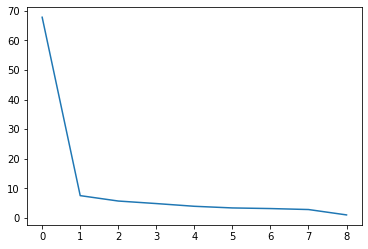

In [38]:
plt.plot(var_exp)

In [39]:
cum_var_exp=np.cumsum(var_exp)
print("Cummulative Variannce Explained",cum_var_exp)

Cummulative Variannce Explained [ 67.8349654   75.33915726  81.01832903  85.83995347  89.74009888
  93.08289413  96.21462092  99.01798518 100.        ]


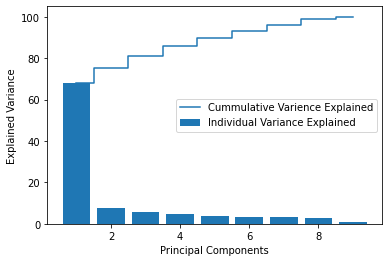

In [40]:
plt.bar(range(1,eig_vals.size+1), var_exp, align='center',label='Individual Variance Explained')
plt.step(range(1,eig_vals.size+1),cum_var_exp,where="mid",label="Cummulative Varience Explained")
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=7) # ~95% of variance is captured using first 7 PC's, which is evident from cummulative variance explained
data_red = pca.fit_transform(df_pca)
data_red.transpose()

array([[-1.51231501,  1.97604903, -1.63432241, ...,  3.92116796,
         2.19554398,  2.90198086],
       [-0.09670572, -0.79629407, -0.12254185, ...,  0.21962074,
        -1.16223716, -1.3258697 ],
       [-0.67617842,  0.75911232, -0.03357059, ...,  0.85041732,
         0.74408938,  1.02989909],
       ...,
       [-0.18396686,  1.26449199, -0.16241554, ..., -0.48330634,
        -1.06409376, -0.60315199],
       [-0.20874316,  0.40159876, -0.42061274, ..., -0.87888785,
        -0.08936094,  0.02406347],
       [-0.31429816,  1.49302846, -0.10556704, ..., -0.4338619 ,
        -0.90326522, -0.75847934]])

In [43]:
pca.components_

array([[ 0.30183998,  0.37146454,  0.36760524,  0.33589313,  0.34238253,
         0.33493653,  0.33961401,  0.33949411,  0.25089184],
       [-0.01780478, -0.07415704, -0.11736244, -0.13197065,  0.0390894 ,
        -0.13931478, -0.24272787,  0.00096327,  0.93975486],
       [-0.90483823,  0.04568887, -0.01717115,  0.32124226,  0.23440668,
        -0.00199922,  0.07616836,  0.11584724,  0.03893809],
       [ 0.00532169,  0.33779904,  0.30332027, -0.32461467,  0.46979873,
        -0.6075436 , -0.25027254,  0.10912364, -0.15531014],
       [ 0.04032621,  0.19050231,  0.20465549,  0.34336041,  0.16973282,
         0.18174589, -0.39884186, -0.76245304,  0.00722209],
       [ 0.21217887, -0.1463834 , -0.18440106,  0.62521514, -0.04277657,
        -0.22096978, -0.52208285,  0.41658393, -0.10901445],
       [-0.05204107, -0.17703866, -0.08329545, -0.36848535,  0.38930802,
         0.6215859 , -0.46171205,  0.23992653, -0.12065216]])

# Q10 Find correlation between components and features

In [44]:
list(df_pca)

['ClumpThickness',
 'Cell Size',
 'Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Normal Nucleoli',
 'Bland Chromatin',
 'Mitoses']

In [45]:
df_comp_feat=pd.DataFrame(pca.components_,columns= list(df_pca))
df_comp_feat

ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0        0.301840   0.371465    0.367605           0.335893   
1       -0.017805  -0.074157   -0.117362          -0.131971   
2       -0.904838   0.045689   -0.017171           0.321242   
3        0.005322   0.337799    0.303320          -0.324615   
4        0.040326   0.190502    0.204655           0.343360   
5        0.212179  -0.146383   -0.184401           0.625215   
6       -0.052041  -0.177039   -0.083295          -0.368485   

   Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                     0.342383     0.334937         0.339614         0.339494   
1                     0.039089    -0.139315        -0.242728         0.000963   
2                     0.234407    -0.001999         0.076168         0.115847   
3                     0.469799    -0.607544        -0.250273         0.109124   
4                     0.169733     0.181746        -0.398842        -0.762453   
5                    -0.042777    -0.220970        -0.522083         0.416584   
6                     0.389308     0.621586        -0.461712         0.239927   

    Mitoses  
0  0.250892  
1  0.939755  
2  0.038938  
3 -0.155310  
4  0.007222  
5 -0.109014  
6 -0.120652

In [46]:
sns.heatmap(df_comp_feat)